In [27]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

In [28]:
lb_w = 0.4 
ub_w = 2.0 
size_w = 200  # Number of grid points
w_grid = np.linspace(lb_w, ub_w, size_w)
z=np.random.normal(0,0.2,4)
z=np.exp(z)
C0 = np.zeros((size_w, size_w)) 
C1 = np.zeros((size_w, size_w))
C2 = np.zeros((size_w, size_w))
C3 = np.zeros((size_w, size_w))
for i in range(size_w):
    for j in range(size_w):
        C0[i, j] = 0.95*w_grid[i]+z[0]*pow(w_grid[i],0.4)-w_grid[4]
        C1[i, j] = 0.95*w_grid[i]+z[1]*pow(w_grid[i],0.4)-w_grid[4]
        C2[i, j] = 0.95*w_grid[i]+z[2]*pow(w_grid[i],0.4)-w_grid[4]
        C3[i, j] = 0.95*w_grid[i]+z[3]*pow(w_grid[i],0.4)-w_grid[4]
C0[C0<=0] = 1e-15
C1[C1<=0] = 1e-15
C2[C2<=0] = 1e-15
C3[C3<=0] = 1e-15
U0=2*np.power(C0,0.5)
U1=2*np.power(C1,0.5)
U2=2*np.power(C2,0.5)
U3=2*np.power(C3,0.5)

In [29]:

VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 3000 
V0 =V1=V2=V3 =np.zeros(size_w) 
Vmat1 =Vmat0=Vmat2=Vmat3= np.zeros((size_w, size_w)) # initialize Vmat matrix
Vstore0=Vstore1=Vstore2=Vstore3 = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            Vmat0[i, j] = U0[i, j] + 0.96 * V0[j]       
    Vstore0[:, VFiter] = V0.reshape(size_w,) # store value function at each iteration for graphing later
    TV0 = Vmat0.max(1) # apply max operator to Vmat (to get V(w))
    PF0 = np.argmax(Vmat0, axis=1)
    VFdist = (np.absolute(V0 - TV0)).max()  # check distance
    V0 = TV0
    VFiter += 1 
if VFiter < VFmaxiter:
    print('V0 converged after this many iterations:', VFiter)
else:
    print('V0 did not converge')            
VF0 = V0
VFiter = 1 
VFdist=7
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            Vmat1[i, j] = U1[i, j] + 0.96 * V1[j]       
    Vstore1[:, VFiter] = V1.reshape(size_w,) # store value function at each iteration for graphing later
    TV1 = Vmat1.max(1) # apply max operator to Vmat (to get V(w))
    PF1 = np.argmax(Vmat1, axis=1)
    VFdist = (np.absolute(V1 - TV1)).max()  # check distance
    V1 = TV1
    VFiter += 1 
if VFiter < VFmaxiter:
    print('V1 converged after this many iterations:', VFiter)
else:
    print('V1 did not converge')            
VF1 = V1
VFiter = 1 
VFdist=7
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            Vmat2[i, j] = U2[i, j] + 0.96 * V2[j]       
    Vstore2[:, VFiter] = V2.reshape(size_w,) # store value function at each iteration for graphing later
    TV2 = Vmat2.max(1) # apply max operator to Vmat (to get V(w))
    PF2 = np.argmax(Vmat2, axis=1)
    VFdist = (np.absolute(V2 - TV2)).max()  # check distance
    V2 = TV2
    VFiter += 1 
if VFiter < VFmaxiter:
    print('V2 converged after this many iterations:', VFiter)
else:
    print('V2 did not converge')            
VF2 = V2
VFiter = 1 
VFdist=7
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over w
        for j in range(size_w): # loop over w'
            Vmat3[i, j] = U0[i, j] + 0.96 * V3[j]       
    Vstore3[:, VFiter] = V3.reshape(size_w,) # store value function at each iteration for graphing later
    TV3 = Vmat3.max(1) # apply max operator to Vmat (to get V(w))
    PF3 = np.argmax(Vmat3, axis=1)
    VFdist = (np.absolute(V3 - TV3)).max()  # check distance
    V3 = TV3
    VFiter += 1 
if VFiter < VFmaxiter:
    print('V3 converged after this many iterations:', VFiter)
else:
    print('V3 did not converge')            
VF3 = V3

V0 converged after this many iterations: 484
V1 converged after this many iterations: 482
V2 converged after this many iterations: 482
V3 converged after this many iterations: 484


In [31]:

optW0 = w_grid[PF0] 
optC0 = 0.95*w_grid+z[0]*pow(w_grid,0.4) - optW0 
optW1 = w_grid[PF1] 
optC1 = 0.95*w_grid+z[0]*pow(w_grid,0.4) - optW0 
optW2 = w_grid[PF2] 
optC2 = 0.95*w_grid+z[0]*pow(w_grid,0.4) - optW0  
optW3 = w_grid[PF3] 
optC3 = 0.95*w_grid+z[0]*pow(w_grid,0.4) - optW0  

<Figure size 432x288 with 0 Axes>

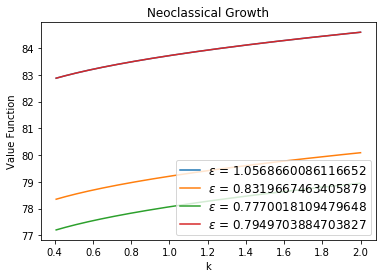

In [32]:
# Plot value function 
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], VF0[1:], label='$\epsilon$ = ' + str(z[0]))
ax.plot(w_grid[1:], VF1[1:], label='$\epsilon$ = ' + str(z[1]))
ax.plot(w_grid[1:], VF2[1:], label='$\epsilon$ = ' + str(z[2]))
ax.plot(w_grid[1:], VF3[1:], label='$\epsilon$ = ' + str(z[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('k')
plt.ylabel('Value Function')
plt.title('Neoclassical Growth')
plt.show()


<Figure size 432x288 with 0 Axes>

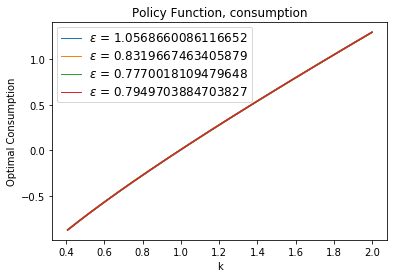

In [33]:
#Plot optimal consumption rule as a function of cake size
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], optC0[1:], label='$\epsilon$ = ' + str(z[0]))
ax.plot(w_grid[1:], optC1[1:], label='$\epsilon$ = ' + str(z[1]))
ax.plot(w_grid[1:], optC2[1:], label='$\epsilon$ = ' + str(z[2]))
ax.plot(w_grid[1:], optC3[1:], label='$\epsilon$ = ' + str(z[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1)  # the legend line width
plt.xlabel('k')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption')
plt.show()

<Figure size 432x288 with 0 Axes>

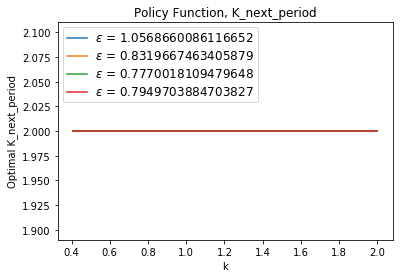

In [34]:
#Plot cake to leave rule as a function of cake size
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[1:], optW0[1:], label='$\epsilon$ = ' + str(z[0]))
ax.plot(w_grid[1:], optW1[1:], label='$\epsilon$ = ' + str(z[1]))
ax.plot(w_grid[1:], optW2[1:], label='$\epsilon$ = ' + str(z[2]))
ax.plot(w_grid[1:], optW3[1:], label='$\epsilon$ = ' + str(z[3]))
# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('k')
plt.ylabel('Optimal K_next_period')
plt.title('Policy Function, K_next_period')
plt.show()